# Getting Started

Linear Regression is a supervised machine learning approach to analyse the relationship between a scalar response and one or more explanatory features or variables. The case of one explanatory variable is called Simple Linear regression and the case with multiple variables is called Multiple Linear Regression.

Linear Regresssion can be used to predict or forecast or explain variation in a response variable by fitting a predictive model to an observed set of values for the features, collecting additional values of the features and making a prediction of the response.

The aim of this project is to build, fit, evaluate and predict the price of houses in a Boston Suburb, Massachusetts, using the given features. This data is a part of the scikit-learn library and is also available in kaggle.

Citation:-

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://medium.com/analytics-vidhya/boston-house-price-prediction-using-machine-learning-ad3750a866cd

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

### Import the needed libraries

In [3]:
import datetime
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load the data from sklearn module

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

#print value of boston data to understand what it contains
#data - This contains information for various houses
#target - This is the prices of the house
#feature_names - names of the predictors or features
#DESCR - This describes the dataset
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
#check out the features of the data set 
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

The Features in the dataset are as follows:-

CRIM  : Per capita crime rate by town

ZN  : Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS  : Proportion of non-retail business acres per town

CHAS  : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX  : Nitric oxide concentration (parts per 10 million)

RM  : Average number of rooms per dwelling

AGE  : Proportion of owner-occupied units built prior to 1940

DIS  : Weighted distances to five Boston employment centers

RAD  : Index of accessibility to radial highways

TAX  : Full-value property tax rate per $10,000

PTRATIO  : Pupil-teacher ratio by town

B  : 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT  : Percentage of lower status of the population

In [6]:
#convert the features or predictors to dataframe 
unscaled_X = pd.DataFrame(boston.data, columns = boston.feature_names)

#print the top 5 rows of the dataset
unscaled_X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
#convert the response to dataframe
y = pd.DataFrame(boston.target)
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Exploratory data analysis

Exploratory analysis is an investigative analysis of the dataset. It helps us to analyze and understand the dataset that we are working with. Visual tools are used to show what the data can tell us beyond the modelling or hypothesis testing.

In [8]:
#check the shape/size of the dataset 
unscaled_X.shape

(506, 13)

There are 506 rows of data with 13 columns.

In [9]:
#check the information about the dataset features
unscaled_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


All the features are non-null and numeric.

In [10]:
#identify the unique number of values 
unscaled_X.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

This helps us understand which column is categorical and which one is Continuous.

Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous. 

In [11]:
#check data statistics
unscaled_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
# check for missing values
unscaled_X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

There are no missing values.

In [13]:
#check the datatype of the features
unscaled_X.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

All features are numeric.

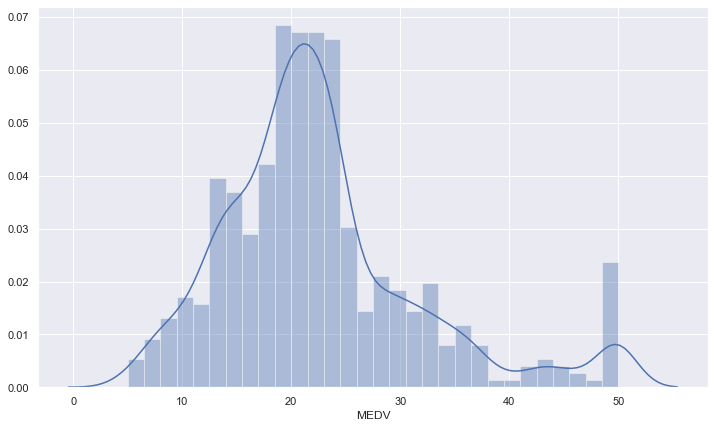

In [14]:
#plot distribution graph for target value 'MEDV'
df = unscaled_X
df['MEDV'] = y
sns.set(rc={'figure.figsize':(12,7)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

The response MEDV is normally distributed.

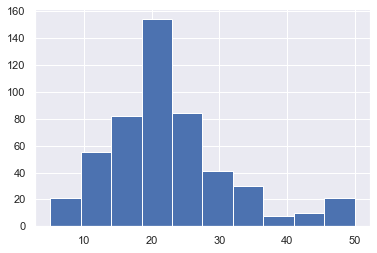

In [22]:
#create Bar chart as the Target variable is Continuous
df['MEDV'].hist()

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each type of values to learn from.

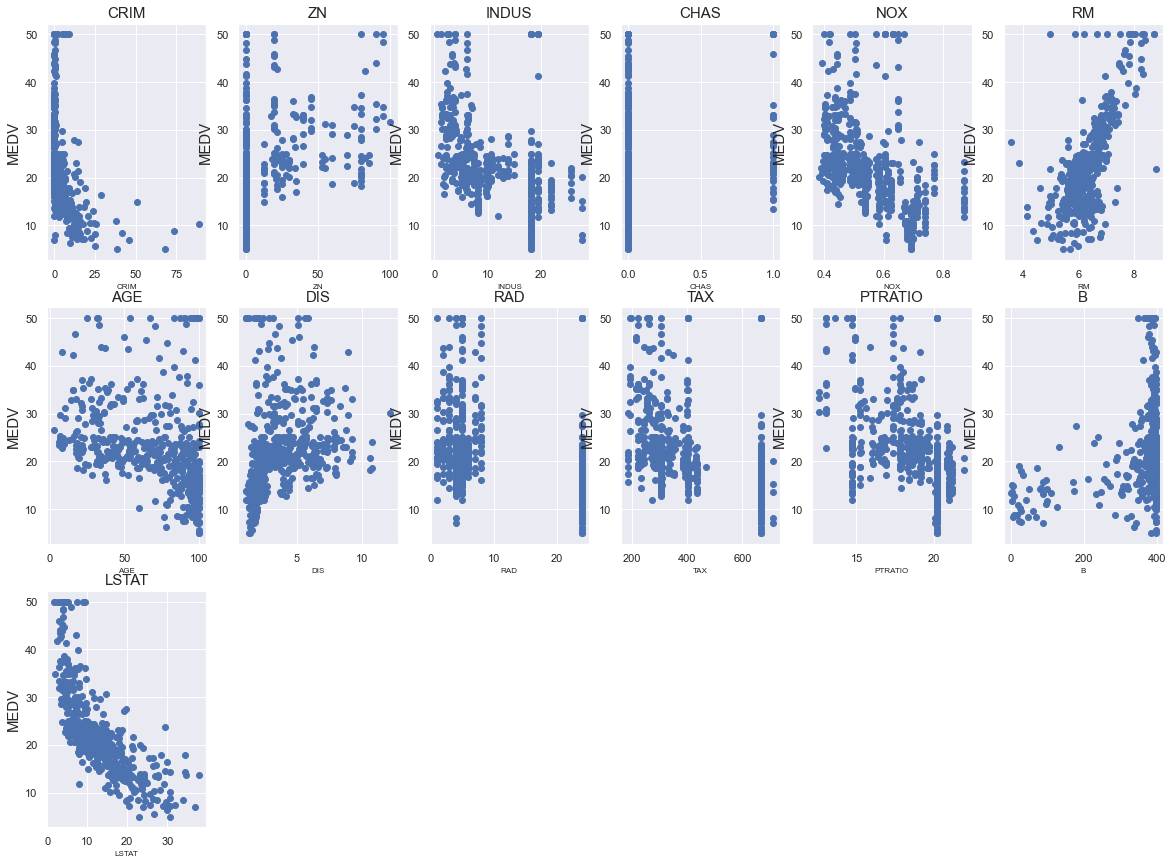

In [23]:
#check the relationship between features and response MEDV 
features = df.drop('MEDV', 1).columns
target = df['MEDV']
plt.figure(figsize=(20,20))
for i, f in enumerate(features):
    # 4 rows of plots,
    #13/3 == 4 plots per row, 
    #i+1 where the plot begins
    plt.subplot(4,len(features)/2, i+1)
    plt.scatter(df[f], target)
    plt.title(f, fontsize=15)
    plt.xlabel(f, fontsize=8) 
    plt.ylabel('MEDV', fontsize=15)

LSTAT and RM look like the only ones that have some sort of linear relationship.  

In [34]:
# check if there is correlation between the features and response
corr = unscaled_X.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


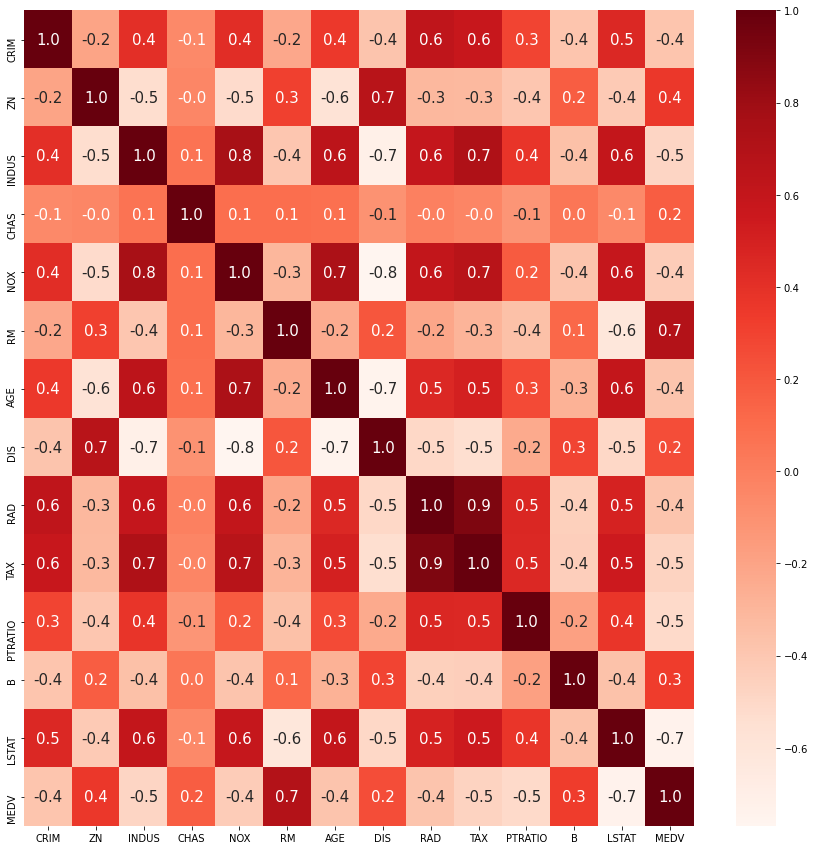

In [36]:
#plot the heatmap of feature correlation 
plt.figure(figsize = (15,15))
sns.heatmap(corr,
           cbar = True,
           fmt = '.1f',
           annot = True,
           annot_kws = {'size':15},
           cmap = 'Reds')

Each square shows the correlation between the variables on each axis(ranging from -1 to +1).
Values closer to zero means there is no linear trend between the two variables.
Values close to 1, means the correlation is the more positively correlated; i.e. as one increases so does the other
and the closer to 1 the stronger this relationship is. 
A correlation closer to -1 is similar,but instead of both increasing one variable will decrease as the other increases. 

From the heatmap and the corr output, we can see that the features RAD and TAX have a correlation of 0.9 or they are closely related to each other. And we can drop one of them. Same goes for the features DIS and AGE, which have a correlation of -0.75.

Also we see that RM has a strong +ve correlation with MEDV(0.7) and LSAT has a high -ve correlation.(-0.75)

### Feature Engineering

As there is high correlation amongst some variables, that leads to overfitting issues we are going to perform Principal Component Analysis.

In [53]:
#scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(unscaled_X)
X = scaler.transform(unscaled_X)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10, whiten = True)
pca.fit(X)
pca_X = pca.transform(X)
pca_X

array([[-0.81503597,  0.38336083, -0.28900608, ...,  0.25210637,
        -0.89388456, -0.40929542],
       [-0.53625824, -0.13295129, -0.83088451, ..., -0.4542018 ,
        -0.37153753, -0.489784  ],
       [-0.92796233,  0.71096657, -0.07743664, ...,  0.12980143,
         0.10288149, -0.38787671],
       ...,
       [-0.14376539,  0.64028834, -0.80296807, ..., -1.18556033,
         1.80623059, -0.38830082],
       [-0.10320683,  0.420046  , -0.88877597, ..., -1.08404742,
         1.71887008, -0.42009529],
       [ 0.0762326 , -0.43401623, -1.35568224, ..., -0.44424097,
         1.51345489, -0.70398233]])

In [18]:
#separate the features and responses
#X = housing.drop('MEDV',axis = 1)
#y = housing['MEDV']

### Model Building

We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [19]:
#Split the housing data to training and test
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_X,y, test_size = 0.2, random_state = 4)

In [20]:
#Train the model
from sklearn.linear_model import LinearRegression

#Create a linear regres#sor 
#lm = LinearRegression()
pca_lm = LinearRegression()

#Train the model using the training sets
pca_model = pca_lm.fit(pca_X_train,pca_y_train)

In [21]:
#value of coefficients
pca_lm.coef_

array([[-5.55041044e+00,  2.64808704e+00,  3.73231722e+00,
        -9.63462047e-01, -1.85415850e+00, -4.12959029e-01,
         1.40736249e-02,  6.03593763e-01, -4.90771065e-03,
         3.89782899e-01]])

In [22]:
#value of y-intercept 
pca_lm.intercept_

array([22.4448409])


### Model Evaluation

We will evaluate our model using several metrtics - R-Squared, Adjusted R-Squared, MAE, MSE and RMSE. 

In [23]:
#make predictions on train data
pca_y_pred = pca_lm.predict(pca_X_test)

In [24]:
#model evaluation
from sklearn import metrics

#r-squared
rsquared = metrics.r2_score(pca_y_test,pca_y_pred)
rsquared

0.6996541896420693

In [25]:
pca_lm.score(pca_X_test,pca_y_test)

0.6996541896420693

𝑅-squared : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable. Higher the value, better is the model performance.

Here 70% of the variation can be explained by our fitted linear regression model.

In [26]:
#Adjusted r-squared
#Adjusted_rsquared  = 1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
Adjusted_rsquared  = 1 - (1-metrics.r2_score(pca_y_test,pca_y_pred))*(len(pca_y_test)-1)/(len(pca_y_test)-pca_X_test.shape[1]-1)
Adjusted_rsquared

0.6666491555368022

Adjusted 𝑅-Squared :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.
R-squared tends to reward you for including too many independent variables in a regression model, and it doesn’t provide any incentive to stop adding more. The adjusted R-squared adjusts for the number of terms in the model.

Adjusted r-squared - 1 – [(1-R2)*(n-1)/(n-k-1)]

where:

R2: The R2 of the model

n: The number of observations

k: The number of predictor variables

Here the Adjusted 𝑅-Squared value is 67%, which is less than the R-squared value as expected.

https://www.kaggle.com/agnihotri/linear-regression-and-pca-boston-housing


https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2


https://www.kaggle.com/shreayan98c/boston-house-price-prediction 

plot to show regression assumptions 

and all preds vs targets

difference after pca via plot

In [27]:
#mean absolute error 
metrics.mean_absolute_error(pca_y_test,pca_y_pred)

3.330344419392741

MAE is the mean of the absolute value of the errors. MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. Lower values are better. 

Here the value is 3.33, which is low.

In [28]:
#mean squared error
metrics.mean_squared_error(pca_y_test,pca_y_pred)

27.898889356953877

The mean square error (MSE) is the the average squared difference between the estimated values and what is estimated.¶
There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect.

Here the MSE is 27.89, which is high.

In [30]:
#root mean squared error
np.sqrt(metrics.mean_squared_error(pca_y_test,pca_y_pred))


5.281939923641112

The RMSE is the square root of the variance of the residuals. Lower values of RMSE indicate better fit. 

RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction. Lower values of RMSE indicate better fit.

The RMSE for our linear model is 5.28.

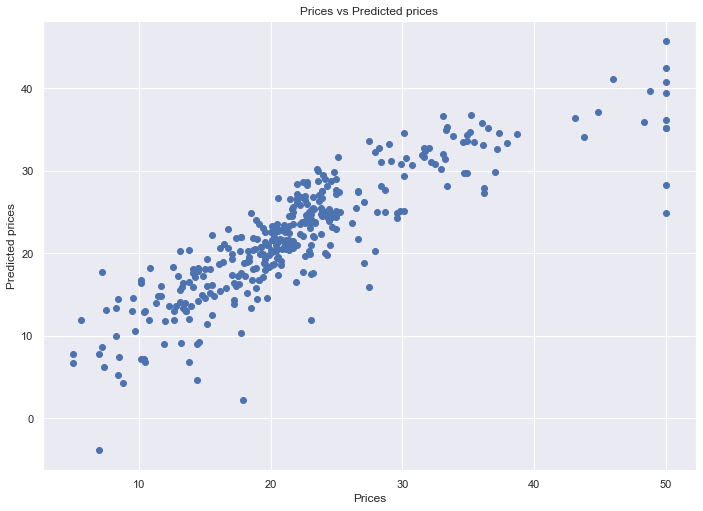

In [26]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

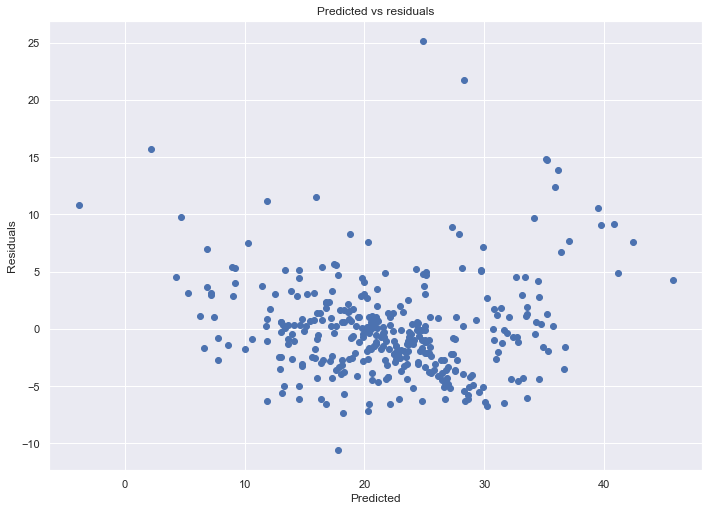

In [27]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot and values are distributed equally around zero. So Linearity assumption is satisfied.

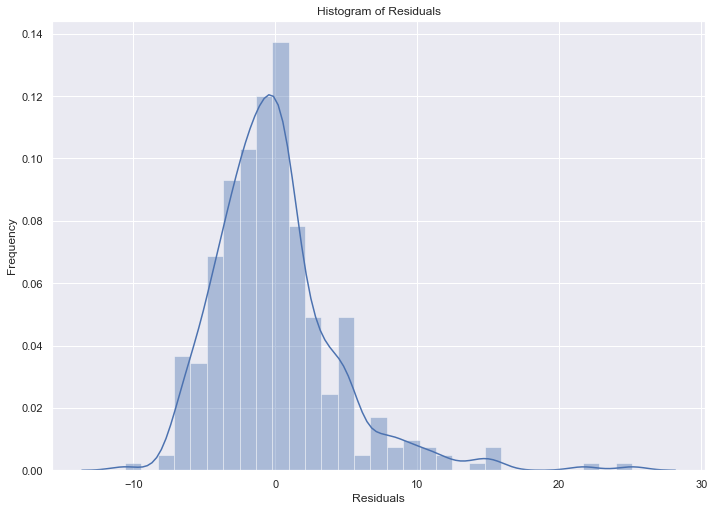

In [28]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

Here the residuals are normally distributed. So normality assumption is satisfied.

###### Conclusion

With an R-squared value of approxiately 70%, the model is not bad, but it is not the best either. We can improve the model by using a bigger dataset for model training, removing outliers, log transforming of features or response or applying other variable selection methods like Lasso, Ridge or Elasticnet. 

From the root mean squared error, we can interpret that on average we are 5.28k dollars off the actual value of a house price.